# Introduction/Business Problem #

 A new investor is looking at the booming scarborough beach area in Perth and thinking that there is an oppitunity to ride the wave and make some real money. In particular they have found a very cheap cafe that is for sale with a completed fitout. The seller insists that there is huge potential and they have simply decided to move to another area.
 
 The investor who is not familar with the area has asked for advice on the area , in particular specific regions or popular trendy locations in the area which are more popular and ultimatly is this in an area that is trendy and well liked. In short : is this going to be a good investmentt?
 
 

## Data Required ##


Number of venues in scarborough? - how many venues and where are they currently located

Foursquare can provide infromaton about the names and locations of the venues in the area, in paricular the area surround the proposed investment location. Specifically we need latitude,longitude, venue id and venue name

Investment location? - where is this proposed location in relation to the other existing venues

The location of the potential investment


How Popular?

We can look to measure the popularity of venues by looking at the count of likes. This data can then be linked with venue locations and displayed graphically to see trendy areas

In [1]:
import requests
import folium
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim 
import datetime
from pandas.io.json import json_normalize 
%matplotlib inline

In [2]:
df = pd.DataFrame(data = [['Scarborough','-31.897920','115.758583',"Perth"]],columns = ["sub","Lat",'Long',"city"])

# Investment Location #

In [3]:
# create folium map
scarboro_map = folium.Map(location = [-31.897920, 115.758583], zoom_start = 25
                        )
for lat, lng, borough, neighborhood in zip(df['Lat'], df['Long'], df['sub'],df['city']):
    label = '{}, {} ({}, {})'.format(neighborhood, borough, lat, lng)
    label = folium.Popup(label, parse_html= True)
    folium.CircleMarker([float(lat),float(lng)],
                       radius = 7,
                       popup = label,
                       color = 'blue',
                       fill = True,
                       fill_color = '#a72920',
                       fill_opacity = 0.5,
                       parse_html = False).add_to(scarboro_map)
display(scarboro_map)

In [4]:


now = datetime.datetime.now()
date = "%4d%02d%02d" % (now.year, now.month, now.day)
CLIENT_ID = '3ECJQTXHODVLXC0PN5LT5NM2ABWKXK4YORSKACOYAQ1RBOU1' # Foursquare ID
CLIENT_SECRET = '0XCMHV3VM5B3MDYANVU20ARUNNHL2LOPJ0DZNQYOYSJWTZ41' # Foursquare Secret


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
VERSION = date 

Your credentails:
CLIENT_ID: 3ECJQTXHODVLXC0PN5LT5NM2ABWKXK4YORSKACOYAQ1RBOU1
CLIENT_SECRET:0XCMHV3VM5B3MDYANVU20ARUNNHL2LOPJ0DZNQYOYSJWTZ41


In [5]:
i = 0
latitude = -31.89804
longitude = 115.76119
neighborhood_name = "Scarborough"

radius = 500
limit = 200
url = "https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        latitude,
        longitude,
        VERSION,
        radius,
        limit)
results = requests.get(url).json()



In [6]:
results
venues = results['response']['venues']
    
nearby_venues = json_normalize(venues) 


# venues in scarborough #

In [7]:
# create folium map
scarboro_map = folium.Map(location = [-31.89804, 115.76119], zoom_start = 15.5
                        )
for lat, lng, borough, neighborhood in zip(nearby_venues['location.lat'], nearby_venues['location.lng'], nearby_venues['name'],nearby_venues['location.city']):
    label = '{}, {} ({}, {})'.format(neighborhood, borough, lat, lng)
    label = folium.Popup(label, parse_html= True)
    folium.CircleMarker([float(lat),float(lng)],
                       radius = 3,
                       popup = label,
                       color = 'red',
                       fill = True,
                       fill_color = '#a72920',
                       fill_opacity = 0.5,
                       parse_html = False).add_to(scarboro_map)
display(scarboro_map)

In [8]:
venues_list = nearby_venues['id'].to_list()

In [9]:
likes = []
for venue_id in venues_list:
    latitude = -31.89804
    longitude = 115.76119
    neighborhood_name = "Scarborough"

    radius = 500
    limit = 200
    url = "https://api.foursquare.com/v2/venues/"+str(venue_id) + "/likes?client_id={}&client_secret={}&v={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            )
    
    results = requests.get(url).json()
    likes.append([results['response']['likes'],venue_id])


In [10]:
like_count = []
venue_ids = []
for r in likes:
    like_count.append(r[0]['count'])
    venue_ids.append(r[1])

In [11]:
len(like_count) == len(venue_ids)

True

In [12]:
df_like = pd.DataFrame(list(zip(like_count, venue_ids)),
  columns=['likes','id'])
df_full = pd.merge(df_like, nearby_venues, on=['id'])
df_full.head()

,likes,id,categories,hasPerk,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,6,4bcf4eda0ffdce725d60b2c0,"[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",False,27 Hastings St,AU,Scarborough,Australia,NaN,256,"[27 Hastings St, Scarborough WA, Australia]","[{'label': 'display', 'lat': -31.8963294515072...",-31.896329,115.759369,NaN,WA,Indian Ocean Hotel,v-1580872308
1,2,4b41cbeef964a520fbc825e3,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,23-27 Scarborough Beach Rd,AU,Perth,Australia,NaN,405,"[23-27 Scarborough Beach Rd, Perth WA 6019, Au...","[{'label': 'display', 'lat': -31.89482, 'lng':...",-31.894820,115.759180,6019,WA,Uncle Ginos,v-1580872308
2,0,56efd14d498eab944d307470,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,291 West Coast Dr,AU,NaN,Australia,NaN,433,"[291 West Coast Dr, Australia]","[{'label': 'display', 'lat': -31.9005655782592...",-31.900566,115.757696,NaN,NaN,Sandpiper complex,v-1580872308
3,15,4b8a6e8ef964a5208b6c32e3,"[{'id': '4bf58dd8d48988d1e2941735', 'name': 'B...",False,The Esplanade,AU,Scarborough,Australia,NaN,674,"[The Esplanade, Scarborough WA 6019, Australia]","[{'label': 'display', 'lat': -31.9014174637221...",-31.901417,115.755268,6019,WA,Brighton Beach,v-1580872308
4,23,5282d5e111d20cad024f5051,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",False,NaN,AU,NaN,Australia,NaN,585,[Australia],"[{'label': 'display', 'lat': -31.8944496822394...",-31.894450,115.756656,NaN,NaN,The Sandbar,v-1580872308


# Venue Popularity #

In [13]:
# create folium map
scarboro_map = folium.Map(location = [-31.89804, 115.76119], zoom_start = 15
                        )
for lat, lng, borough, neighborhood,size in zip(df_full['location.lat'], df_full['location.lng'], df_full['name'],df_full['location.city'],df_full['likes']):
    label = '{}, {} ({}, {})'.format(neighborhood, borough, lat, lng)
    label = folium.Popup(label, parse_html= True)
    folium.CircleMarker([float(lat),float(lng)],
                       radius = size,
                       popup = label,
                       color = 'red',
                       fill = True,
                       fill_color = '#a72920',
                       fill_opacity = 0.5,
                       parse_html = False).add_to(scarboro_map)
display(scarboro_map)

# Check for Outliers #

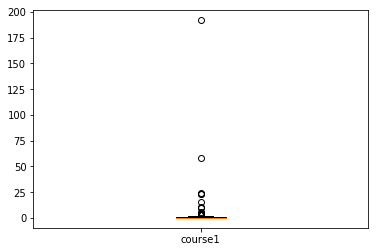

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(df_full['likes'],patch_artist=True,labels=['course1'])
plt.show()

In [15]:
df_full['likes'].max()

192

In [16]:
df_full.loc[df_full['likes']==df_full['likes'].max()]

,likes,id,categories,hasPerk,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
5,192,4b518846f964a520224f27e3,"[{'id': '4bf58dd8d48988d1e2941735', 'name': 'B...",False,The Esplanade,AU,Scarborough,Australia,NaN,714,"[The Esplanade, Scarborough WA 6015, Australia]","[{'label': 'display', 'lat': -31.8944402125553...",-31.89444,115.754925,6015,WA,Scarborough Beach,v-1580872308


In [17]:
df_full2 = df_full.drop(df_full['likes'].idxmax())

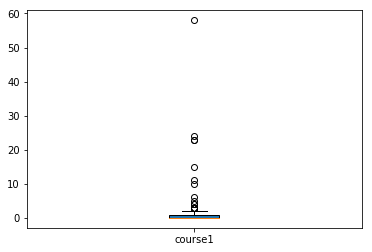

In [18]:
plt.boxplot(df_full2['likes'],patch_artist=True,labels=['course1'])
plt.show()

# Map with Outlier removed #

In [19]:
# create folium map
scarboro_map = folium.Map(location = [-31.89804, 115.76119], zoom_start = 16
                        )
for lat, lng, borough, neighborhood,size in zip(df_full2['location.lat'], df_full2['location.lng'], df_full2['name'],df_full2['location.city'],df_full2['likes']):
    label = '{}, {} ({}, {})'.format(neighborhood, borough, lat, lng)
    label = folium.Popup(label, parse_html= True)
    folium.CircleMarker([float(lat),float(lng)],
                       radius = size,
                       popup = label,
                       color = 'red',
                       fill = True,
                       fill_color = '#a72920',
                       fill_opacity = 0.5,
                       parse_html = False).add_to(scarboro_map)
display(scarboro_map)

In [20]:
scarboro_onehot = pd.get_dummies(df_full2[['name']], prefix="", prefix_sep="")
scarboro_onehot['name'] = df_full2['name'] 
fixed_columns = [scarboro.columns[-1]] + list(toronto_onehot.columns[:-1])
scarboro_onehot = scarboro_onehot[fixed_columns]

scarboro_grouped= scarboro_onehot.groupby(['name']).mean().reset_index()

NameError: name 'scarboro' is not defined

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = []
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = scarboro_grouped['name']

fixed_columns = [neighborhoods_venues_sorted.columns[-1]] + list(neighborhoods_venues_sorted.columns[:-1])
neighborhoods_venues_sorted = neighborhoods_venues_sorted[fixed_columns]

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

In [ ]:
# set number of clusters
kclusters = 5

scarboro_grouped_clustering = toronto_grouped.drop('name', 1)
#cluster
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scarboro_grouped_clustering)

In [ ]:
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

scarboro_merged = df_full2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
scarboro_merged = scarboro_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')


In [ ]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=16)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(scarboro_merged['location.lat'], scarboro_merged['location.lng'], scarboro_merged['name'], scarboro_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters